In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("usedCars.xls")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [10]:
numericalFeatures = ["Mileage", "Cylinder", "Liter", "Doors"]
categoricalFeatures = ["Make", "Model", "Trim", "Type"]

In [11]:
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")

In [12]:
X_train_num = scaler.fit_transform(X_train[numericalFeatures])
X_test_num  = scaler.transform(X_test[numericalFeatures])
X_train_cat = encoder.fit_transform(X_train[categoricalFeatures])
X_test_cat  = encoder.transform(X_test[categoricalFeatures])

In [13]:
X_train = np.hstack([X_train_num, X_train_cat])
X_test  = np.hstack([X_test_num,  X_test_cat])

In [14]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
models = [Ridge(), Lasso(), LinearRegression()]

In [16]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__}\nRMSE: {mse}\nR2: {r2}\n")

Ridge
RMSE: 880.1575502956646
R2: 0.9902328866983524

Lasso
RMSE: 833.8248639569503
R2: 0.9912341290940868

LinearRegression
RMSE: 835.0512930969089
R2: 0.9912083236130677



c:\Users\kaptan\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+08, tolerance: 6.560e+06
  model = cd_fast.enet_coordinate_descent(


In [17]:
from matplotlib import pyplot as plt

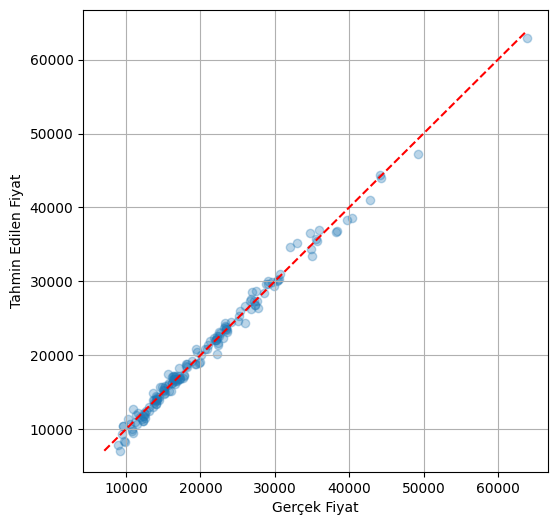

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.title('')
plt.grid(True)
plt.show()

#### **Sonuçlar:**

**Ridge**
- *RMSE:* 880.1575502956646
- *R2:* 0.9902328866983524


**Lasso**
- *RMSE:* 833.8248639569503
- *R2:* 0.9912341290940868

**LinearRegression**
- *RMSE:* 835.0512930969089
- *R2:* 0.9912083236130677

#### **Yorum:**

Düzenlileştirme (regularization) sayesinde Lasso, modelin genelleme yeteneğini hafifçe iyileştirmiş olabilir. Ancak bu iyileşme oldukça küçük; pratikte standart doğrusal regresyonu kullanmak da yeterli görünüyor. Eğer modelin karmaşıklığı ve gereksiz özellik etkileri azaltılmak isteniyorsa Lasso iyi bir tercih, ama en azından bu veri setinde aşırı overfitting (aşırı öğrenme) sorunu da yok gibi görünüyor.

In [19]:
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")

X_numerical = scaler.fit_transform(X[numericalFeatures])
X_categorical = encoder.fit_transform(X[categoricalFeatures])
X = np.hstack([X_numerical, X_categorical])

In [20]:
import joblib

In [21]:
joblib.dump(scaler,  "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")
print("Scaler and encoder saved to scaler.pkl and encoder.pkl")

Scaler and encoder saved to scaler.pkl and encoder.pkl


In [22]:
model = Lasso()
model.fit(X, y)


c:\Users\kaptan\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.364e+08, tolerance: 7.846e+06
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [23]:
features = numericalFeatures + list(encoder.get_feature_names_out(categoricalFeatures))
coef = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient')

display(coef)

,Feature,Coefficient
24,Model_Deville,-7756.834904
10,Model_9-2X AWD,-5066.204951
57,Trim_GT Coupe 2D,-4105.011210
28,Model_Grand Prix,-3453.597519
35,Model_Monte Carlo,-3148.130952
...,...,...
89,Type_Convertible,5972.787085
23,Model_Corvette,6374.297685
8,Make_SAAB,12371.982514
41,Model_XLR-V8,13894.863763


#### **Yorum:**

Tablo incelendiğinde Lasso’nun coef_ vektörünü nasıl yapılandırdığına dair birkaç önemli çıkarım yapılabilir:
1. *Aşırı küçülterek sıfırlananlar (Coefficient = 0.0)*
Birçok Model_*, Trim_*, Make_* ve Type_* özelliği tam olarak 0’a inmiş. Yani Lasso, bu kategorilerin fiyatı tahmin etme gücünü ihmal edilebilir gördüğü için tamamen kaldırmış.
2. *Negatif katsayılılar → fiyatı düşürüyor*
– En güçlü negatif etki “Model_Deville” (–7 756 $), “Model_9‑2X AWD” (–5 066 $), “Trim_GT Coupe 2D” (–4 105 $) gibi modeller/trim’ler için.
– Sayısal özellik olarak “Mileage” de –1 509 $ ile yüksek km’li araçların fiyatını ortalamadan epey aşağı çekiyor.
3. *Pozitif katsayılılar → fiyatı yükseltiyor*
– Marka/model bazında “Make_Cadillac” (+15 656 $), “Make_SAAB” (+12 372 $), “Model_XLR‑V8” (+13 895 $) ve “Model_Corvette” (+6 374 $) en yüksek artışı getiriyor.
– Sayısal özelliklerden “Liter” (+4 047 $) ve “Cylinder” (+1 185 $) da, motor hacmi ve silindir sayısı arttıkça fiyatı anlamlı biçimde yukarı kaydırıyor.
4. *Küçük etki (küçük katsayılar)*
– “Doors” (–134 $) ve bazı “Type_” (ör. Sedan, Coupe) ya fiyatı çok az yükseltir, ya da hemen hemen hiç etki etmez.


**Özetle:**
- Çok güçlü pozitif/negatif etkiye sahip birkaç kategoriyi ve sayısal değişkeni tutmuş,
- Geri kalan “gürültü” niteliğindeki özelliklerin tamamını sıfıra indirerek modelin daha sade ve genellenebilir olmasını sağlamış.

In [24]:
joblib.dump(model, "model.pkl")
print("Model saved to model.pkl")


Model saved to model.pkl
